In [1]:
#python 2 and 3 comptibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import json
import io
import gzip
import base64
from astropy.io import fits
import matplotlib.pylab as plt
import pickle as pkl
import numpy as np
%matplotlib inline

data_path = '/home/asceta/Projects/Alerce/AlerceDHtest/datasets/ZTF'

#with open('/home/asceta/LRPpaper/datasets/ZTF/reals.pkl', 'rb') as f:
#    reals = pkl.load(f)
#with open('/home/asceta/LRPpaper/datasets/ZTF/bogus.pkl', 'rb') as f:
#    bogus = pkl.load(f)
    
#print('Number of reals: %d' %len(reals))
#print('Number of bogus: %d' %len(bogus))

In [2]:
path = data_path+'/broker_reals.json'
with open(path, "r") as f:
        dataset = json.load(f)
        


In [8]:
KEY_TO_GET = 'magapbig'
data_dict = {"g":{}, "r":{}, "i":{}}
filters_ls = list(data_dict.keys())
for alert in dataset["query_result"]:
    magapbig = alert["candidate"][KEY_TO_GET]
    fid = alert["candidate"]["fid"]
    
    if KEY_TO_GET in data_dict[filters_ls[fid-1]].keys():
        data_dict[filters_ls[fid-1]][KEY_TO_GET].append(magapbig)
    else:
        data_dict[filters_ls[fid-1]][KEY_TO_GET] = [magapbig,]
    

In [24]:
#all data to array
#all_data_array = []
#for channel in data_dict.keys():
#    try:
#        all_data_array.append(data_dict[channel][KEY_TO_GET])
#    except:
#        pass

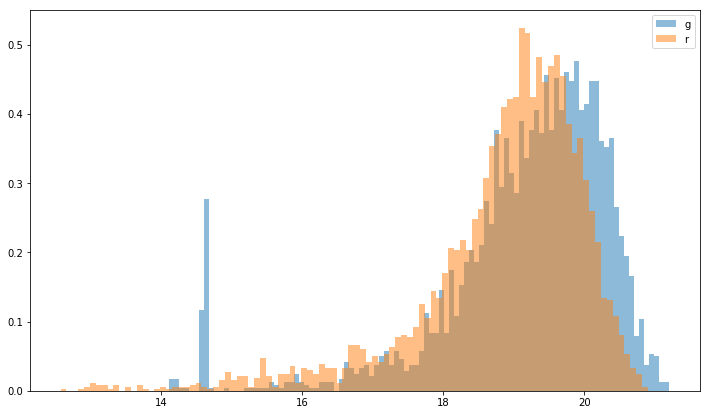

In [30]:
plt.figure(figsize=(12,7))
for channel in filters_ls:
    try:
        plt.hist(data_dict[channel][KEY_TO_GET], label=channel, alpha=0.5, bins = 100, density=True)
    except:
        pass
plt.legend()
plt.show()
    